In [1]:
# imports and setup
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import math

import pandas as pd

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
x_df = pd.read_csv('datasets/data_abalone/x_train.csv')
x_NF = x_df.values

In [3]:
x_NF.shape

(3176, 8)

In [10]:
x_df.columns

Index(['is_male', 'length_mm', 'diam_mm', 'height_mm', 'whole_weight_g',
       'shucked_weight_g', 'viscera_weight_g', 'shell_weight_g'],
      dtype='object')

In [17]:
xlength_N1 = x_NF[:, 1:2]

In [18]:
y_df = pd.read_csv('datasets/data_abalone/y_train.csv')
y_N = y_df.values[:,0]

In [19]:
y_N.shape

(3176,)

# Nearest Neighbor Regression

In [31]:
import sklearn.neighbors

In [32]:
knn_regr = sklearn.neighbors.KNeighborsRegressor(algorithm='brute', metric='euclidean')

In [33]:
knn_regr.fit(xlength_N1, y_N)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
xgrid = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)

In [35]:
yhat_knn = knn_regr.predict(xgrid[:,np.newaxis])

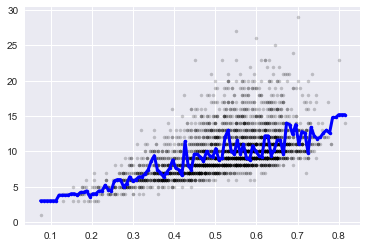

In [37]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(xgrid, yhat_knn, 'b.-', linewidth=3);

## Decision Tree Regression

In [20]:
import sklearn.tree

In [21]:
tree_regr = sklearn.tree.DecisionTreeRegressor(random_state=42, min_samples_leaf=500)

In [22]:
tree_regr.fit(xlength_N1, y_N)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=500,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [23]:
xgrid = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)

In [24]:
yhat = tree_regr.predict(xgrid[:,np.newaxis])

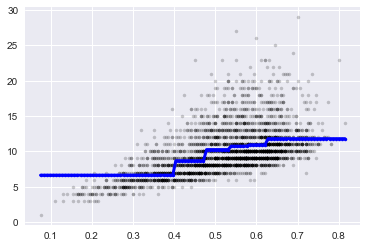

In [30]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(xgrid, yhat, 'b.-', linewidth=3);